In [9]:
import sys
import pandas as pd
import numpy as np
import os
# Add the scripts folder to the Python path
sys.path.append(os.path.abspath("../scripts"))


# Now you can import the functions from data_loader
from data_loader import load_dataset, load_all_data
from data_visualization import plot_publication_trends, plot_sentiment_distribution
from data_analysis import calculate_text_lengths, articles_per_publisher, publication_trends,sentiment_analysis,extract_keywords

ModuleNotFoundError: No module named 'textblob'

In [2]:
# Define the path to a specific file
file_path = "../Data/raw_data/raw_analyst_ratings.csv"

# Load a single dataset
data_frame = load_dataset(file_path)

# Display the first few rows of the loaded dataset
print(data_frame.head(2))

# Load all datasets in a directory
# data_directory = "../Data/raw_data/"
# all_data = load_all_data(data_directory)

# # Display keys of all data frames loaded
# print(list(all_data.keys()))


Dataset loaded successfully from: ../Data/raw_data/raw_analyst_ratings.csv
   Unnamed: 0                                    headline  \
0           0     Stocks That Hit 52-Week Highs On Friday   
1           1  Stocks That Hit 52-Week Highs On Wednesday   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  


In [3]:
# Step 1: Drop rows with null values in critical columns (e.g., 'headline', 'publisher', 'date')
data_frame = data_frame.dropna(subset=['headline', 'publisher', 'date'])

# Step 2: Remove rows where the 'headline' column is empty or has invalid data
data_frame = data_frame[data_frame['headline'].str.strip() != '']

# Step 3: Check for and remove duplicate rows
data_frame = data_frame.drop_duplicates()

# Step 4: Ensure 'date' column is in datetime format
data_frame['date'] = pd.to_datetime(data_frame['date'], errors='coerce')

# Drop rows where 'date' couldn't be converted (i.e., invalid date formats)
data_frame = data_frame.dropna(subset=['date'])

# Now, proceed with your analysis
text_stats = calculate_text_lengths(data_frame, column='headline')
print("Text Length Statistics:")
print(text_stats)

# Articles per publisher
publisher_counts = articles_per_publisher(data_frame, column='publisher')
print("\nArticles per Publisher:")
print(publisher_counts)

# Publication trends
publication_counts = publication_trends(data_frame, column='date')
print("\nPublication Trends:")
print(publication_counts)

# Sentiment analysis and Keyword extraction
sentiment_data = sentiment_analysis(data_frame, column='headline')
print("\nSentiment Analysis Results:")
print(sentiment_data[['headline', 'sentiment']])

keywords = extract_keywords(data_frame, column='headline', n=10)
print("\nMost Common Keywords:")
print(keywords)


Text Length Statistics:
         Unnamed: 0   text_length
count  5.598700e+04  55987.000000
mean   7.133525e+05     80.015254
std    4.023792e+05     56.126094
min    0.000000e+00     12.000000
25%    3.718360e+05     42.000000
50%    7.124110e+05     63.000000
75%    1.068692e+06     91.000000
max    1.413791e+06    512.000000

Articles per Publisher:
publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
                     ...  
Jennifer Lynn            1
Tatro Capital            1
webmaster                1
Thomas Stein             1
Usman Rafi               1
Name: count, Length: 225, dtype: int64

Publication Trends:
date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Length: 2528, dtype: int64

Sentiment Analysis Results:
                   

loading data set 

In [4]:
from scripts.data_visualization import plot_publication_trends, plot_sentiment_distribution

# Plot publication trends
plot_publication_trends(publication_counts)

# Plot sentiment distribution
plot_sentiment_distribution(data, column='sentiment')


ModuleNotFoundError: No module named 'scripts.data_visualization'

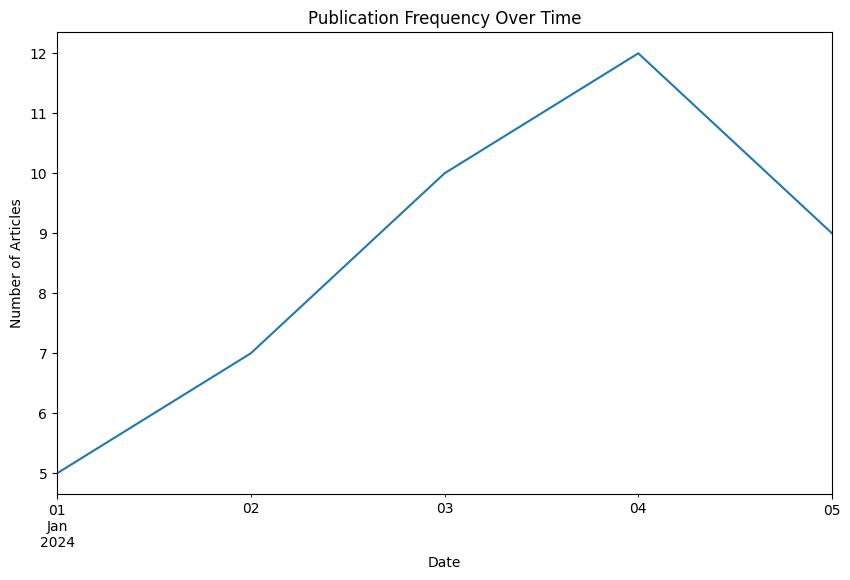

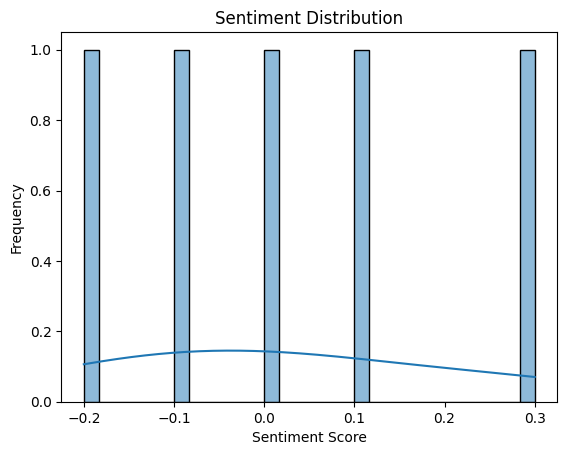

In [5]:


# Example of publication counts over time (replace with your actual data)
publication_counts = pd.Series([5, 7, 10, 12, 9], 
                               index=pd.date_range('2024-01-01', periods=5, freq='D'))

# Example sentiment data (replace with your actual sentiment data)
sentiment_data = pd.DataFrame({
    'headline': ['Headline 1', 'Headline 2', 'Headline 3', 'Headline 4', 'Headline 5'],
    'sentiment': [0.1, -0.2, 0.0, 0.3, -0.1]
})

# Now, call the functions to visualize the data

# Plot publication trends over time
plot_publication_trends(publication_counts)

# Plot sentiment distribution
plot_sentiment_distribution(sentiment_data)
